# 4.3 Random Walks

In [2]:
import math
import pandas
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
def walk_2d(N, method):
    x = 0
    y = 0
    x_cor = [x]
    y_cor = [y]    

    if method == "norm":
        for i in range(N):
            dx = (random.random() - 0.5)*2
            dy = (random.random() - 0.5)*2
            L = math.sqrt(dx**2 + dy**2)
            x += dx/L
            y += dy/L
        
            x_cor.append(x)
            y_cor.append(y)
    
        return [x_cor, y_cor]
    else:
        for i in range(N):
            dx = (random.random() - 0.5)*2
            dy = (random.random() - 0.5)*2
            x += dx
            y += dy
        
            x_cor.append(x)
            y_cor.append(y)

        return [x_cor, y_cor]
    

def walk_distance(N, method):
    walk = walk_2d(N, "norm") if method == "norm" else walk_2d(N, "rand")
    return math.sqrt( (walk[0][-1])**2 + (walk[1][-1])**2 )

def avg_distance(N, method):
    distances = []
    
    for n in range(N):
        k = round(math.sqrt(n)) if n>0 else 1
        trials = []
        for _ in range(k):
            trials.append(walk_distance(n, method))

        distances.append(sum(trials)/k)

    return distances

## 2D Random Walk Simulations

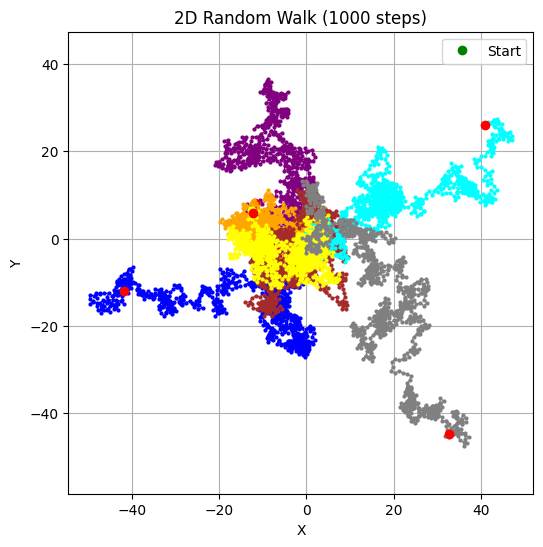

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(0, 0, 'go', label='Start')

plt.title("2D Random Walk (1000 steps)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis("equal")
plt.legend()

color_list = ["blue", "purple", "orange", "brown", "cyan", "yellow", "grey"]


for i in range(7):
    walk = walk_2d(1000, "norm")
    x, y = walk[0], walk[1]
    plt.plot(x, y, color = color_list[i], marker='o', linestyle='-', linewidth=0.8, markersize = 2)
    plt.plot(x[-1], y[-1], 'ro', label='End')

## Average Distance vs N

In [5]:
normalized = avg_distance(1000, "norm")
random = avg_distance(1000, "rand")

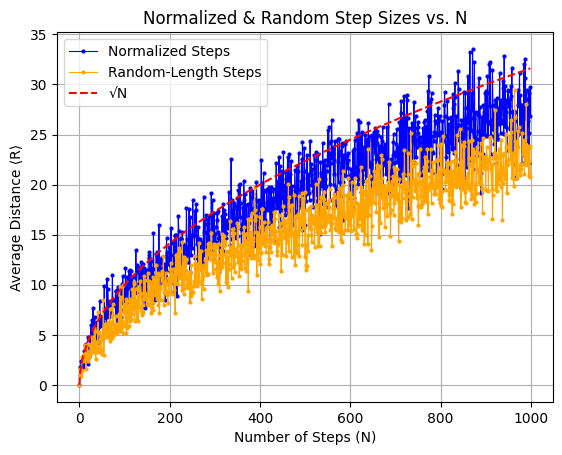

In [6]:
n_val = np.arange(0, 1000)

plt.plot(n_val, normalized, 'o-', label='Normalized Steps', linewidth=0.8, markersize = 2, color = 'blue')
plt.plot(n_val, random, 'o-', label='Random-Length Steps', linewidth=0.8, markersize = 2, color = 'orange')
plt.plot(n_val, np.sqrt(n_val), '--', label='√N', color = 'red')

plt.xlabel("Number of Steps (N)")
plt.ylabel("Average Distance ⟨R⟩")
plt.title("Normalized & Random Step Sizes vs. N")
plt.legend()
plt.grid(True)
plt.show()

## Random Walks in N Dimensions

In [7]:
def walk_nd(N, dim):
    position = np.zeros(dim)
    for _ in range(N):
        step = np.random.uniform(-1, 1, size=dim)
        L = np.linalg.norm(step)
        if L == 0:
            continue
        position += step / L
    return np.linalg.norm(position)

def avg_distance_nd(N, dim):
    k = int(np.sqrt(N))
    distances = [walk_nd(N, dim) for _ in range(k)]
    return np.mean(distances)

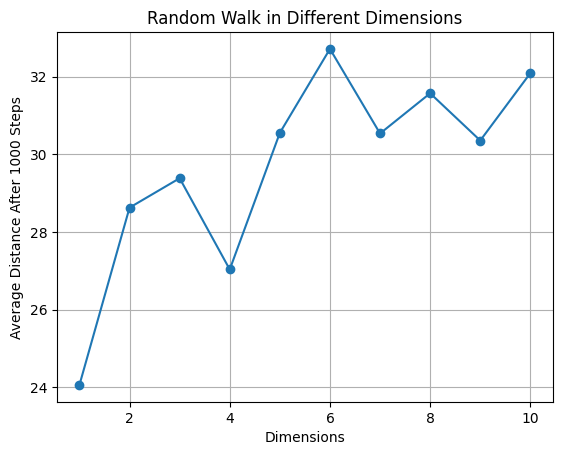

In [8]:
dims = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
N = 1000
results = [avg_distance_nd(N, d) for d in dims]

import matplotlib.pyplot as plt

plt.plot(dims, results, 'o-')
plt.xlabel("Dimensions")
plt.ylabel(f"Average Distance After {N} Steps")
plt.title("Random Walk in Different Dimensions")
plt.grid(True)

# 5.14 Monte Carlo Integration by Stone Throwing

## 2-Dimension Estimation of π

In [190]:
c = 0
EPS = 10**-4
n = 0
pi = 0

n_list = []
pi_list = []

while True:
    x = random.random()
    y = random.random()
    d = math.sqrt(x**2 + y**2)
    c+=1 if d < 1 else 0
    n+=1

    n_list.append(n)
    pi_list.append(4*c/(n))
    
    if abs(((4*c/(n))-math.pi))<EPS:
        break

In [191]:
n,c,4*c/(n)

(424, 333, 3.141509433962264)

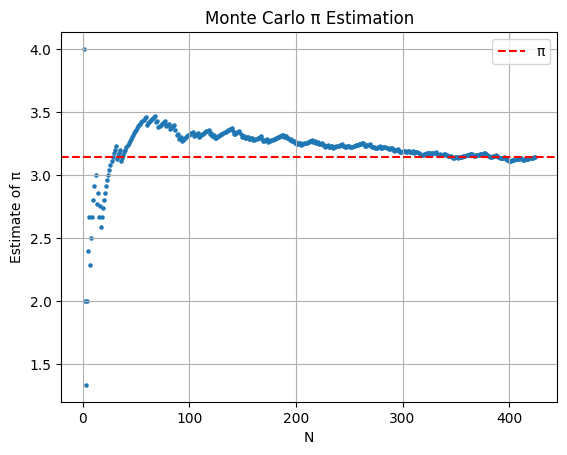

In [192]:
plt.scatter(n_list, pi_list, s=5)
plt.xlabel('N')
plt.ylabel('Estimate of π')
plt.title('Monte Carlo π Estimation')

plt.axhline(y=math.pi, color='red', linestyle='--', label='π')
plt.legend()
plt.grid(True)

## Estimating Volume of N-Dimension Spheres

In [78]:
def sphere_vol(n, R):
    return ( (math.pi ** (n / 2))  /  (math.gamma((n / 2) + 1)) ) * (R ** n)
    
N = 10**6

def mc_vol(n,R):
    s = 0

    for i in range(N):
        point = [random.uniform(-R, R) for j in range(n)]
        d = math.sqrt(sum(x**2 for x in point))
        if d <= R:
            s += 1
    
    vol_cube = (2 * R) ** n
    vol_sphere = (s / N) * vol_cube

    return vol_sphere

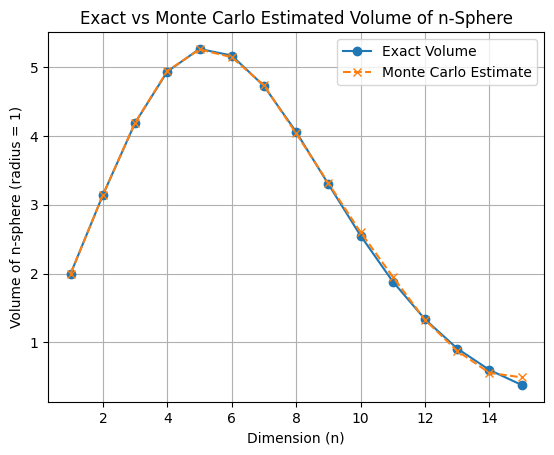

In [79]:
dimensions = list(range(1, 16))
R = 1

known_vols = [sphere_vol(n, R) for n in dimensions]
mc_vols = [mc_vol(n, R) for n in dimensions]

plt.plot(dimensions, known_vols, 'o-', label='Exact Volume')
plt.plot(dimensions, mc_vols, 'x--', label='Monte Carlo Estimate')
plt.xlabel('Dimension (n)')
plt.ylabel('Volume of n-sphere (radius = 1)')
plt.title('Exact vs Monte Carlo Estimated Volume of n-Sphere')
plt.legend()
plt.grid(True)
plt.show()